In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [172]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [173]:
df.shape

(400, 9)

In [174]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [176]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [177]:
df.duplicated().sum()

0

In [178]:
df.drop(columns=['Serial No.'],inplace=True)

In [179]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [180]:
df.shape

(400, 8)

In [181]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [182]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [183]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [184]:
X_train_scaled

array([[0.64      , 0.64285714, 0.5       , ..., 0.375     , 0.59935897,
        1.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.5       , 0.64102564,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.25      , 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ]])

In [185]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [186]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [187]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [188]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [189]:
history = model.fit(X_train_scaled,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0552 - val_loss: 0.0382
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0406 - val_loss: 0.0323
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0364 - val_loss: 0.0278
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0308 - val_loss: 0.0221
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0234 - val_loss: 0.0173
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0186 - val_loss: 0.0147
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0138 - val_loss: 0.0123
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0129 - val_loss: 0.0100
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0100 - val_loss: 0.0079
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086 - val_loss: 0.0074
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076 - val_loss: 0.0072
E

In [190]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [191]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)



0.7557573241533206

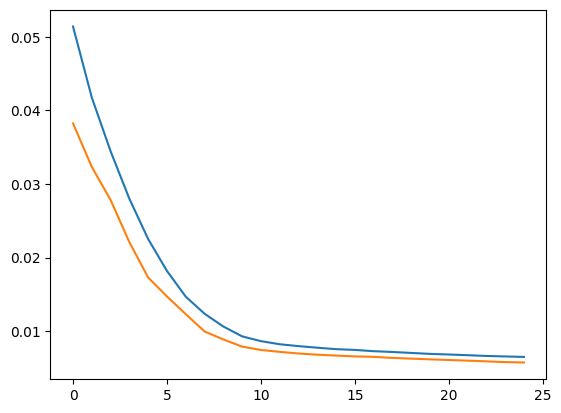

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])